In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt

best_archive_gaits_performances = [[6.57613, 7.3229, 6.97599, 7.88487, 7.00843],
                      [6.70002, 5.18389, 3.69695, 4.57972, 5.06481],
                      [5.55867, 3.00569, 4.47951, 5.17837, 5.61022],
                      [3.18089, 4.63308, 6.52621, 5.06646, 4.19755],
                      [4.63455, 4.70811, 3.89433, 4.15992, 4.16067],
                      [4.69121, 6.12128, 5.36918, 5.87907, 5.52443],
                      [0.141583, 1.95004, 2.45867, 2.45867, 2.54667],
                      [6.52613, 4.98316, 5.74232, 6.1004, 5.75128],
                      [4.22474, 4.11561, 4.93113, 5.59758, 5.47702],
                      [0, 4.17411, 4.1786, 4.1951, 4.64789],
                      [0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0.143234],
                      [0, 1.7574, 0.990009, 1.42968, 1.27533],
                      [1.24471, 0, 1.25245, 1.30602, 1.28246],
                      [2.56069, 1.40563, 2.9613, 0, 2.55922]]

def present(directory):
    final_dists = []
    boxes = []
    boxes_x = []
    references = []
    
    dmgid = 0
    box_counter = 0
    for dmgdir in sorted(os.listdir(directory + "/iteresults")):
        boxes_x.append(dmgdir)
        boxes_x.append("")
        dmgid += 1
        
        final_dists = []
        for subdir in os.listdir(directory + "/iteresults/" + dmgdir):
            
            if subdir != "ref.txt":
                x = np.loadtxt(directory + "/iteresults/" + dmgdir + "/" + subdir + "/best_aggregated_observations.dat")
                best_score = x[len(x)-1][1]
                final_dists.append(best_score)
        
        boxes.append(final_dists) 
        boxes.append(best_archive_gaits_performances[box_counter]) # append the best archive sol. performance for comparison 
        box_counter += 1
        
        ref = np.loadtxt(directory + "/iteresults/" + dmgdir + "/ref.txt")
        references.append(ref)
        
    fig = plt.figure(figsize = [12,8])
    axes = fig.add_axes([0.1,0.1,0.8,0.8])
    axes.boxplot(boxes)
    axes.set_ylim([0,10])
    colors = ['y', 'b', 'g']
    markers = ['^', 'o', 's']
    labels = ['tripod', 'hill climbing', 'stair climbing']
    
    ref_count = 0
    for i in range(len(references)):
        for j in range(len(references[i])):
            if i == 0:
                axes.plot(i+1+ref_count, references[i][j], label=labels[j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
            else:
                axes.plot(i+1+ref_count, references[i][j], color=colors[j], marker=markers[j], markeredgecolor='k', markersize=5)
        ref_count += 1
    ticks = np.linspace(1, len(boxes), len(boxes))
    plt.ylabel("max covered meters in 5s")
    plt.xticks(ticks, boxes_x)
    # plt.xlabel("damage type")
    plt.grid(axis='y')
    plt.axvline(x=18.5, color='k', linestyle='-')
    
    i = 2.5
    while i < 30:
        plt.axvline(x=i, color='k', linestyle='--', linewidth = 0.5)
        i+=2
    plt.savefig(directory + "/plots/maxscore.pdf")
    plt.legend()
    plt.show()

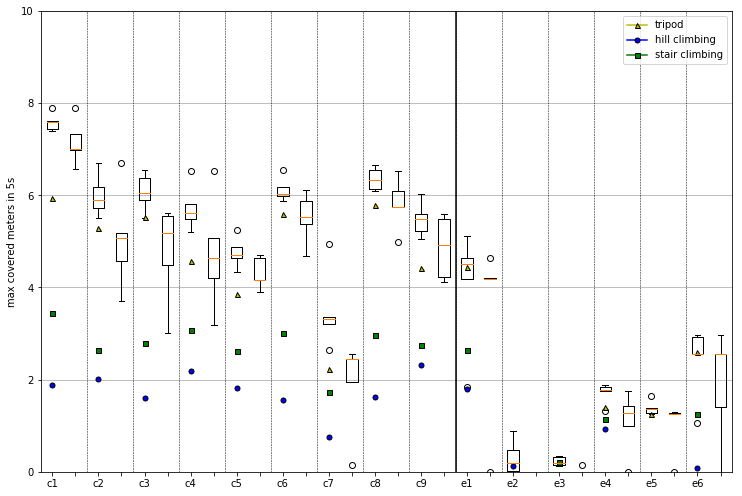

In [50]:
# present("dc2307")
#/home/aran/itev2/map_stats/dcf0608/iteresults
present("dcf0608")